In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Part 1: Cost Complexity Pruning
# Train a full decision tree and get effective alphas for pruning
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [11]:
# Train decision trees with different alphas
clfs = []# 
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

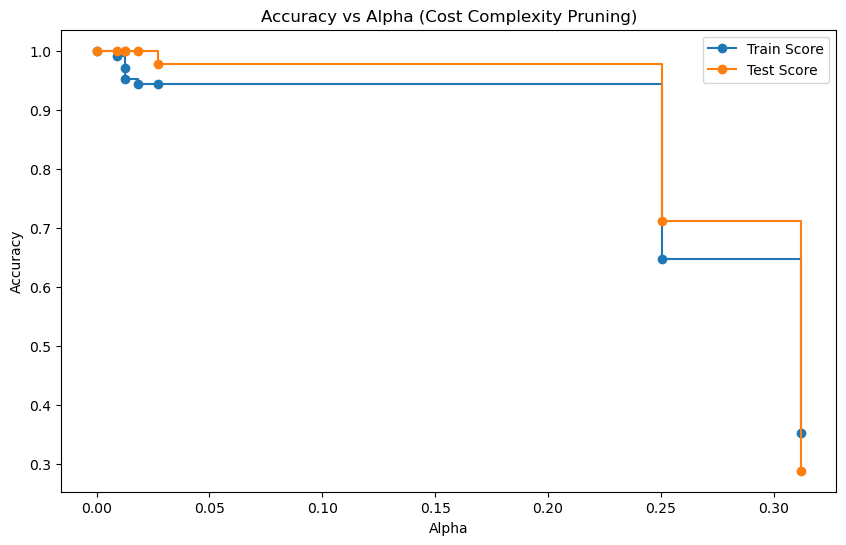

In [13]:
# Plot accuracy vs. alpha on training and testing sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Score", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Score", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha (Cost Complexity Pruning)")
plt.legend()
plt.show()

In [15]:
# Select the best alpha based on test set performance
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]
best_tree_ccp = clfs[best_alpha_index]

print(f"Best alpha for Cost Complexity Pruning: {best_alpha}")
print(f"Test accuracy with best alpha: {test_scores[best_alpha_index]:.4f}")

Best alpha for Cost Complexity Pruning: 0.0
Test accuracy with best alpha: 1.0000


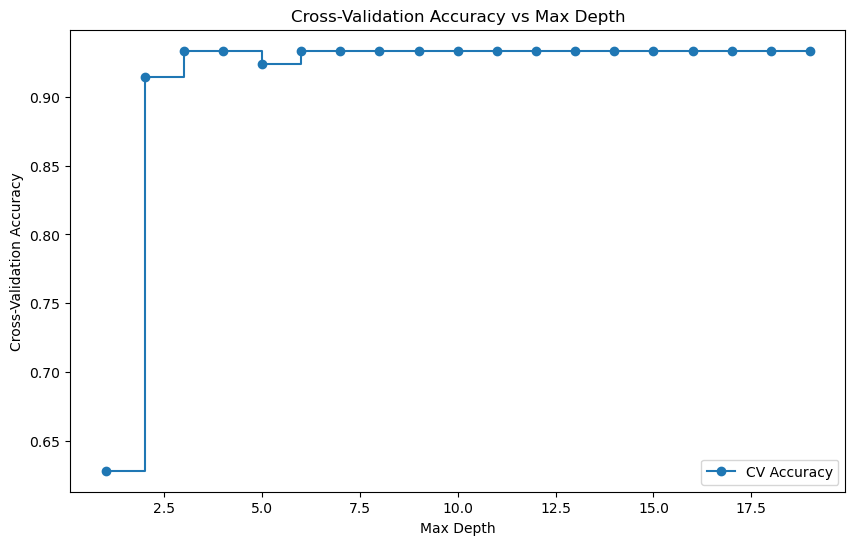

Best max depth for Cross-Validation Pruning: 3
Test accuracy with best max depth: 1.0000


In [17]:
# Part 2: Cross-Validation Pruning
# Train a decision tree with cross-validation to select the best max_depth
depth_range = range(1, 20)
cv_scores = []

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Plot cross-validation accuracy vs max depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, cv_scores, marker='o', label="CV Accuracy", drawstyle="steps-post")
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Accuracy vs Max Depth")
plt.legend()
plt.show()

# Select the best max depth based on cross-validation
best_depth_index = np.argmax(cv_scores)
best_depth = depth_range[best_depth_index]
best_tree_cv = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
best_tree_cv.fit(X_train, y_train)

print(f"Best max depth for Cross-Validation Pruning: {best_depth}")
print(f"Test accuracy with best max depth: {best_tree_cv.score(X_test, y_test):.4f}")
